# **Data Intensive Applications Laboratory**

**Assignment 2**

**Clustering and Classification with Python**

    Said Furkan Ayvaz - 21426682

# Problem Definition

This assignment aims to try to find out how we can diagnose breast cancer, using the machine learning methods from the features created by digitizing the images of breast cancer. These features define the properties of the cell nuclei in the image. Your primary purpose here is to cluster and classify the data according to the diagnosis (M = malignant, B = benign). 

We need to accurately predict the disease using clustering and classification methods. If the data set contains missing values, we should explain how to deal with them. After analyzing the dataset, it is determined which properties are used for clustering and classification in order to make accurate predictions.

By comparing the results we obtained, the most accurate method is determined for this problem. We try to identify what affects the results.

# Import and organize the dataset

I used a variety of python libraries in the solution of this problem. Pandas for data analysis, Matplotlib and Seaborn for visualization of Data, Scicit-learn were used for machine learning. I used the Google Colab environment during the development phase.

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans

The data document in Github is read with Pandas. The 'id' column in the dataset is used for indexing.

In [333]:
#Read data.csv
url = 'https://raw.githubusercontent.com/saidFurkan/ML-with-Python/master/data.csv'
data = pd.read_csv(url,index_col=0)
print(data.head())

         diagnosis  radius_mean  ...  fractal_dimension_worst  Unnamed: 32
id                               ...                                      
842302           M        17.99  ...                  0.11890          NaN
842517           M        20.57  ...                  0.08902          NaN
84300903         M        19.69  ...                  0.08758          NaN
84348301         M        11.42  ...                  0.17300          NaN
84358402         M        20.29  ...                  0.07678          NaN

[5 rows x 32 columns]


With the Shape method, it is seen that the data set consists of 32 columns and 569 rows in each column.

In [334]:
print(data.shape)

(569, 32)


Null data control is performed for each column in the dataset. These null values ​​reduce the quality of our data. We need to get rid of these values.

In [335]:
#Checking Null Value
data.isnull().sum()/len(data)*100  

diagnosis                    0.0
radius_mean                  0.0
texture_mean                 0.0
perimeter_mean               0.0
area_mean                    0.0
smoothness_mean              0.0
compactness_mean             0.0
concavity_mean               0.0
concave points_mean          0.0
symmetry_mean                0.0
fractal_dimension_mean       0.0
radius_se                    0.0
texture_se                   0.0
perimeter_se                 0.0
area_se                      0.0
smoothness_se                0.0
compactness_se               0.0
concavity_se                 0.0
concave points_se            0.0
symmetry_se                  0.0
fractal_dimension_se         0.0
radius_worst                 0.0
texture_worst                0.0
perimeter_worst              0.0
area_worst                   0.0
smoothness_worst             0.0
compactness_worst            0.0
concavity_worst              0.0
concave points_worst         0.0
symmetry_worst               0.0
fractal_di

In [0]:
#Delete the last column because all its values are Null
data.drop("Unnamed: 32",axis=1, inplace=True)

The 'Unnamed: 32' column with all values ​​null is deleted from the dataset. There is no null value in other columns. If there were a small number of null values ​​in other columns, we could fill them with values ​​like column average.

In [337]:
data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

The data in the 'diagnosis' column is of the object type. In order for the program to use this data, it is replaced with numerical data. B = 0, M = 1

In [338]:
# Converts M and B values in the diagnosis column to 0 and 1. B = 0, M = 1
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['diagnosis'] = label.fit_transform(data['diagnosis'])
print(data.tail(10))
print(data.groupby("diagnosis").size())

        diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
id                              ...                                         
925291          0        11.51  ...          0.2112                  0.08732
925292          0        14.05  ...          0.2250                  0.08321
925311          0        11.20  ...          0.1566                  0.05905
925622          1        15.22  ...          0.4089                  0.14090
926125          1        20.92  ...          0.2929                  0.09873
926424          1        21.56  ...          0.2060                  0.07115
926682          1        20.13  ...          0.2572                  0.06637
926954          1        16.60  ...          0.2218                  0.07820
927241          1        20.60  ...          0.4087                  0.12400
92751           0         7.76  ...          0.2871                  0.07039

[10 rows x 31 columns]
diagnosis
0    357
1    212
dtype: int64


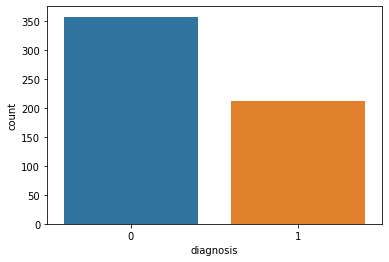

In [339]:
sns.countplot(data["diagnosis"],label="count")

Data properties are visualized in binary relative to each other. As in the straight out graphic, one of the data pairs can be removed from the dataset. These data are almost the same. It both prolongs the working time of the program and causes an unwanted noise. 'Heatmap' can be used to better detect this data.

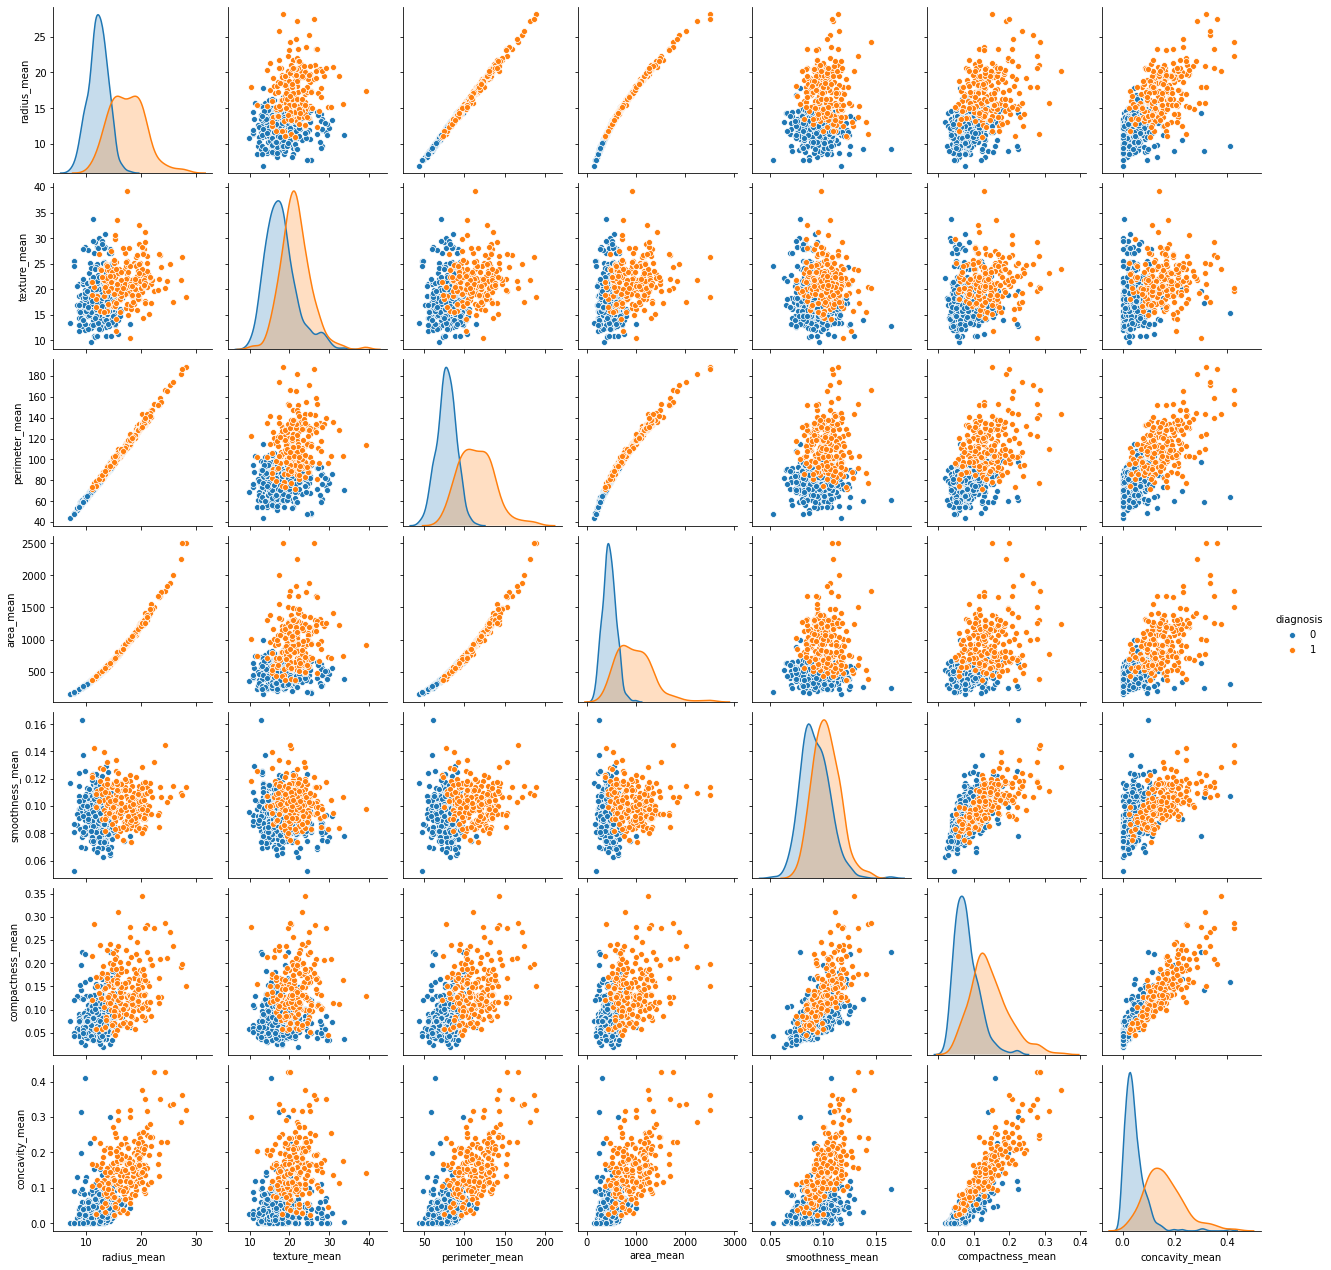

In [340]:
#Create a pairplot
sns.pairplot(data.iloc[:,:8],hue='diagnosis')

Here we can more easily identify the data similarity. One of the values with high correlation value is subtracted from the dataset.

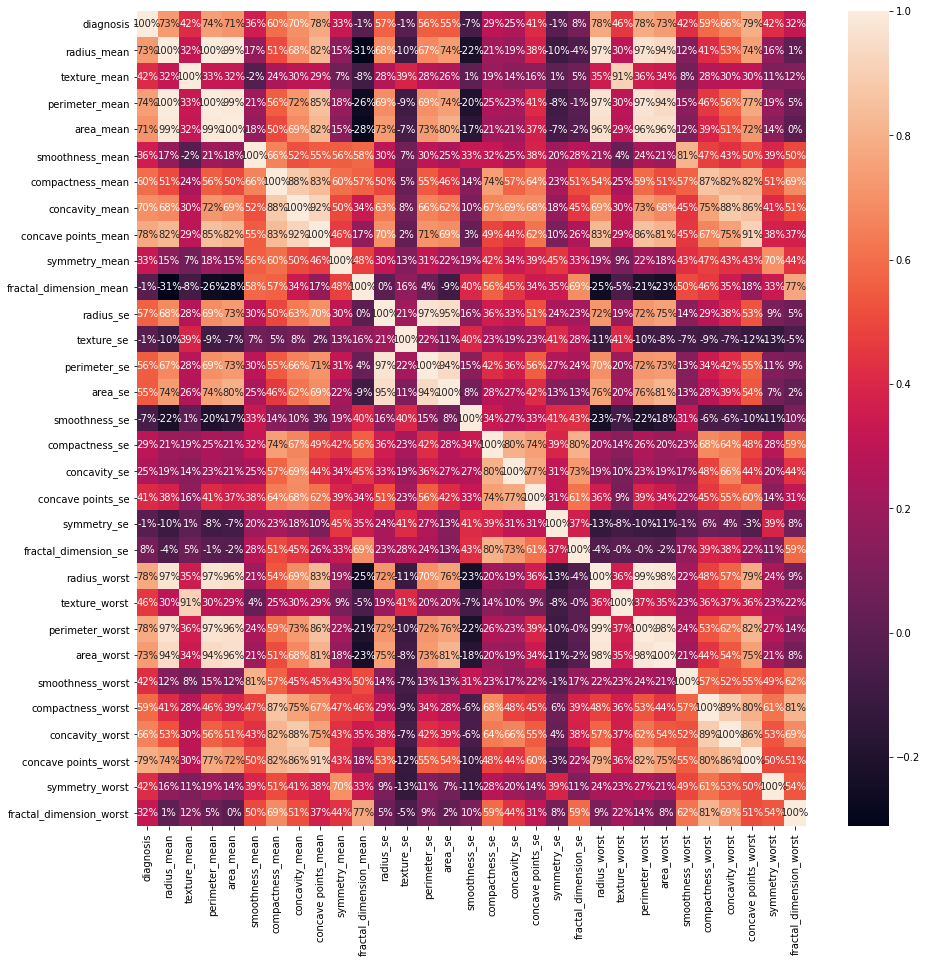

In [341]:
plt.figure(figsize=(15,15))
sns.heatmap(data.iloc[:,:].corr(), annot=True, fmt=".0%")

I get a backup of the data set without deleting some of the features. To compare them in later stages

In [0]:
notDropData = data.copy()

In [0]:
#One of the two highly correlated features is being deleted.
data.drop("perimeter_mean",axis=1, inplace=True)
data.drop("area_mean",axis=1, inplace=True)
data.drop("perimeter_worst",axis=1, inplace=True)

# Normalize

The data was normalized in this way and stored as a separate dataset.

In [344]:
min_max_tr = lambda x: (x - x.min()) / (x.max() - x.min())
N_Data = data.transform(min_max_tr)
print(N_Data.head())

          diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
id                                ...                                         
842302          1.0     0.521037  ...        0.598462                 0.418864
842517          1.0     0.643144  ...        0.233590                 0.222878
84300903        1.0     0.601496  ...        0.403706                 0.213433
84348301        1.0     0.210090  ...        1.000000                 0.773711
84358402        1.0     0.629893  ...        0.157500                 0.142595

[5 rows x 28 columns]


The target and feature parts of the original and normalized data are separated.

In [0]:
#Original
y_O = data.iloc[:,0].values #["diagnosis"]
x_O = data.iloc[:,1:].values

In [0]:
#Normalized
y_N = N_Data.iloc[:,0].values #["diagnosis"]
x_N = N_Data.iloc[:,1:].values

In [0]:
#NoDropData
y_noDrop = notDropData.iloc[:,0].values #["diagnosis"]
x_noDrop = notDropData.iloc[:,1:].values

# Clustering

## 1 - Clustering for original dataset

The Elbow Method is used to decide how many pieces of data are clustered. It is seen that the best result will be obtained by creating 2 groups.

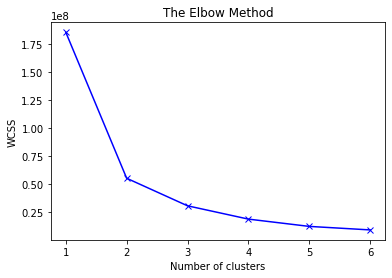

In [348]:
#Finding the optimum number of clusters for k-means
wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x_O)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 7), wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The dataset is divided into two groups and visualized with K Means, an unsupervised learning method. Target data is not used in unsupervised learning method. Clustering is done according to the proximity of numerical values.

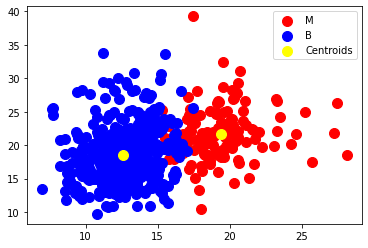

In [349]:
#Now, instantiate and fit our K-means cluster model. I am going to use 2 clusters and a random state of 0.
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_O_kmeans = kmeans.fit_predict(x_O)

plt.scatter(x_O[y_O_kmeans == 0, 0], x_O[y_O_kmeans == 0, 1], s = 100, c = 'red', label = 'M')
plt.scatter(x_O[y_O_kmeans == 1, 0], x_O[y_O_kmeans == 1, 1], s = 100, c = 'blue', label = 'B')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [350]:
# Comparing numerical values to understand which group is bening or malignant
count = 0
for i in y_O_kmeans:
    if i == 0:
        count += 1
print(count)

130


The clustering made is compared with the correct target data of the dataset. Here, in the clustering made for the original data, the result was 85%.

In [351]:
size = len(y_O)
count = 0
for i in range(size):
    if(y_O[i] != y_O_kmeans[i] ):
        count += 1

accuracy_score_Clustering_Original = count/size
print("Correct number of predictions : ", count)
print("Correct rate of predictions : ", accuracy_score_Clustering_Original*100)

Correct number of predictions :  485
Correct rate of predictions :  85.23725834797891


Visualization was made to compare the clustering results in the 'Texture Mean' and 'Radius Mean' categories. It is observed how successful the clustering is.

Text(0.5, 1.0, 'Predicted')

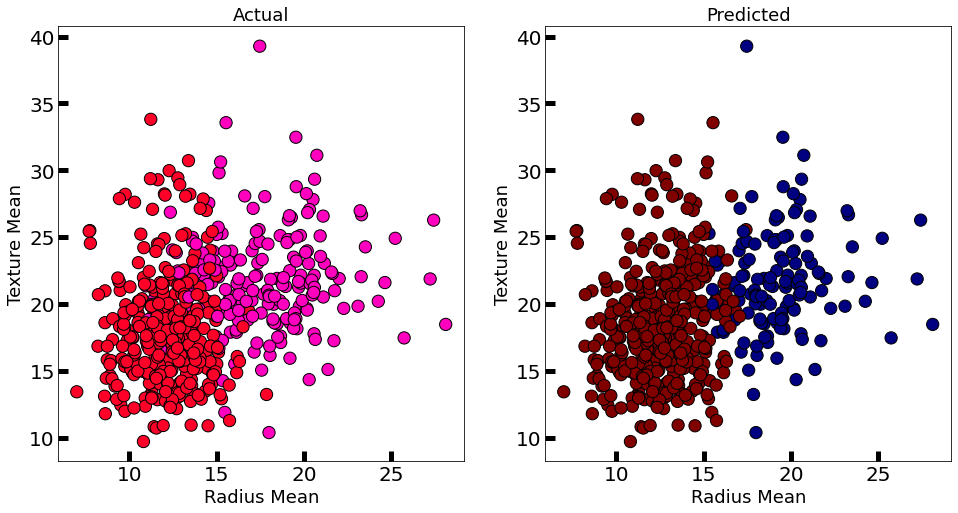

In [352]:
pred_labels = kmeans.labels_

# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(x_O[:, 0], x_O[:, 1], c=y_O, cmap='gist_rainbow', edgecolor='k', s=150)
axes[1].scatter(x_O[:, 0], x_O[:, 1], c=pred_labels, cmap='jet', edgecolor='k', s=150)
axes[0].set_xlabel('Radius Mean', fontsize=18)
axes[0].set_ylabel('Texture Mean', fontsize=18)
axes[1].set_xlabel('Radius Mean', fontsize=18)
axes[1].set_ylabel('Texture Mean', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

When the same operation was done for non-feature-selected data, the result was 85.41%. It gave the same result as the original data. The benefit of choosing feature was just time.

In [353]:
# Clustering results of non-feature-selected data
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_noDrop_kmeans = kmeans.fit_predict(x_noDrop)

size = len(y_noDrop)
count = 0
for i in range(size):
    if(y_noDrop[i] != y_noDrop_kmeans[i] ):
        count += 1

print("Correct number of predictions : ", count)
print("Correct rate of predictions : ", count/size*100)

Correct number of predictions :  486
Correct rate of predictions :  85.41300527240774


These clustering operations are also made for the Normalized dataset. When we compared the results, I observed that Normalized data was better grouped.

The accuracy rate of the original data set is 85.23%.

The accuracy rate of the normalized data set is 90.68%.


## 2 - Clustering for normalized dataset

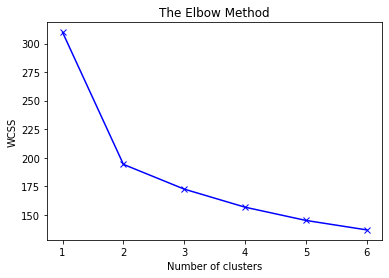

In [354]:
#Finding the optimum number of clusters for k-means
wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x_N)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 7), wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

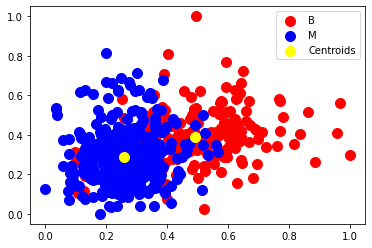

In [355]:
#Now, instantiate and fit our K-means cluster model. I am going to use 2 clusters and a random state of 0.
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_N_kmeans = kmeans.fit_predict(x_N)
#print(y_N_kmeans)

plt.scatter(x_N[y_N_kmeans == 0, 0], x_N[y_N_kmeans == 0, 1], s = 100, c = 'red', label = 'B')
plt.scatter(x_N[y_N_kmeans == 1, 0], x_N[y_N_kmeans == 1, 1], s = 100, c = 'blue', label = 'M')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [356]:

size = len(y_N)
count = 0
for i in range(size):
    if(y_N[i] != y_N_kmeans[i]):
        count += 1

accuracy_score_Clustering_Normalized = count/size
print("Correct number of predictions : ", count)
print("Correct rate of predictions : ", accuracy_score_Clustering_Normalized*100)

Correct number of predictions :  516
Correct rate of predictions :  90.68541300527241


Text(0.5, 1.0, 'Predicted')

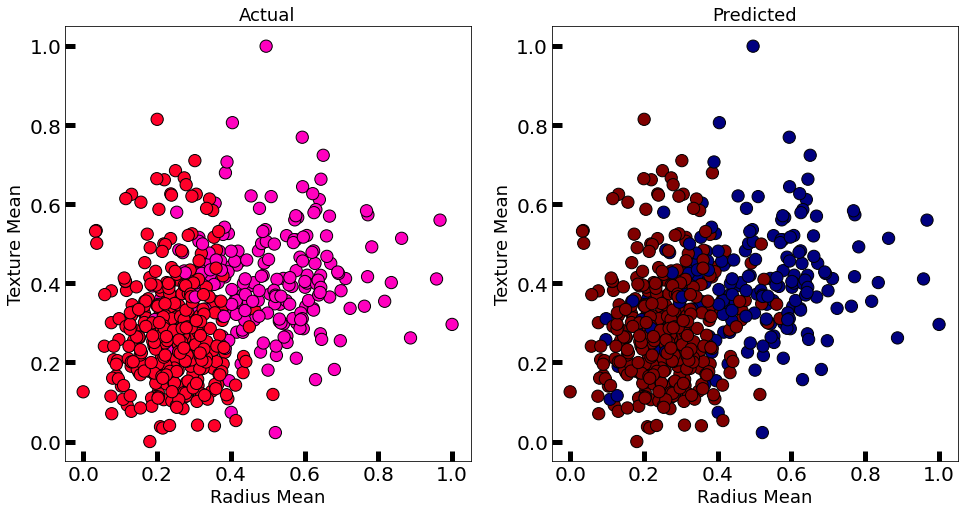

In [357]:
pred_labels = kmeans.labels_

# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(x_N[:, 0], x_N[:, 1], c=y_N, cmap='gist_rainbow', edgecolor='k', s=150)
axes[1].scatter(x_N[:, 0], x_N[:, 1], c=pred_labels, cmap='jet', edgecolor='k', s=150)
axes[0].set_xlabel('Radius Mean', fontsize=18)
axes[0].set_ylabel('Texture Mean', fontsize=18)
axes[1].set_xlabel('Radius Mean', fontsize=18)
axes[1].set_ylabel('Texture Mean', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

# Classification

## Split the datasets

The original and Normalized data set is divided into training and test data with the 'train_test_split' function. The ratio of test data to all data is 20%. Random_state is assigned 0 to collect the same values ​​from 2 datasets.

In [0]:
X_O_train, X_O_test, Y_O_train, Y_O_test = train_test_split(x_O, y_O, test_size = 0.2, random_state = 0)

In [0]:
X_N_train, X_N_test, Y_N_train, Y_N_test = train_test_split(x_N, y_N, test_size = 0.2, random_state = 0)

In [0]:
x_noDrop_train, x_noDrop_test, y_noDrop_train, y_noDrop_test = train_test_split(x_noDrop, y_noDrop, test_size = 0.2, random_state = 0)

## 1 - Classification original dataset

I tested the training data with 6 models to get more successful results. In order to reach better test results, cross validation tests are carried out with 5 different groupings from the training data. When the results are evaluated, the most successful model is chosen.

In [361]:
# Model list
models = [
    ("LDA", LinearDiscriminantAnalysis()),
    ("KNN", KNeighborsClassifier()),
    ("DT", DecisionTreeClassifier(criterion='entropy',random_state = 123)),
    ("RFC", RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=123)),
    ("NB", GaussianNB()),
    ("SVM", SVC(random_state = 123))
]

# We find the best among 6 models
results = []
names = []
for name, model in models:
    score = model_selection.cross_val_score(model, X_O_train, Y_O_train, cv=5)
    print("name : ", name, "\tcross validation score : ", score.mean() ,"\t, ", score)

name :  LDA 	cross validation score :  0.9516483516483516 	,  [0.95604396 0.94505495 0.91208791 0.97802198 0.96703297]
name :  KNN 	cross validation score :  0.9010989010989011 	,  [0.94505495 0.89010989 0.87912088 0.92307692 0.86813187]
name :  DT 	cross validation score :  0.9164835164835166 	,  [0.87912088 0.94505495 0.9010989  0.92307692 0.93406593]
name :  RFC 	cross validation score :  0.956043956043956 	,  [0.95604396 0.95604396 0.92307692 0.96703297 0.97802198]
name :  NB 	cross validation score :  0.9384615384615385 	,  [0.92307692 0.96703297 0.9010989  0.94505495 0.95604396]
name :  SVM 	cross validation score :  0.9120879120879121 	,  [0.92307692 0.89010989 0.9010989  0.91208791 0.93406593]


After the model is selected, the model is trained with training data. The trained model is tested with test data. Results are shown in various report formats.

In [362]:
# I chose the Random Forest Classifier model that works best.
RFC = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=123)
RFC.fit(X_O_train, Y_O_train)
predictions = RFC.predict(X_O_test)

accuracy_score_Classification_Original = accuracy_score(Y_O_test, predictions)
print('accuracy score :', accuracy_score_Classification_Original)
print(confusion_matrix(Y_O_test, predictions))
print(classification_report(Y_O_test, predictions))

accuracy score : 0.956140350877193
[[66  1]
 [ 4 43]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        67
           1       0.98      0.91      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



When we compare the data with the feature selected and the data without the feature selected, the success of the data without the feature was 1% higher. Normally, we expect a better result in the feature selected data. But the opposite happened here. I think it can happen for two reasons. I may have chosen too much or incorrect data. As our data set is not very large, I may have encountered such results.

In [363]:
# Clustering results of non-feature-selected data
RFC = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=123)
RFC.fit(x_noDrop_train, y_noDrop_train)
predictions = RFC.predict(x_noDrop_test)

print('accuracy score :', accuracy_score(y_noDrop_test, predictions))
print(confusion_matrix(y_noDrop_test, predictions))
print(classification_report(y_noDrop_test, predictions))

accuracy score : 0.9649122807017544
[[65  2]
 [ 2 45]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



These operations are performed with Original and Normalized datasets. The results are compared. The same results were obtained when using the same model (Random Forest Classifier) ​​to test. The reason we get the same values ​​is related to how this model handles data. I do not know exactly the mathematical reason. I understood that whether the numbers are large, small or positive or negative is not important for this model.

## 2 - Classification normalized dataset

In [364]:
# Model list
models = [
    ("LDA", LinearDiscriminantAnalysis()),
    ("KNN", KNeighborsClassifier()),
    ("DT", DecisionTreeClassifier(criterion='entropy',random_state = 123)),
    ("RFC", RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=123)),
    ("NB", GaussianNB()),
    ("SVM", SVC(random_state = 123))
]

# We find the best among 5 models
results = []
names = []
for name, model in models:
    score = model_selection.cross_val_score(model, X_N_train, Y_N_train, cv=5)
    print("name : ", name, "\tcross validation score : ", score.mean() ,"\t, ", score)

name :  LDA 	cross validation score :  0.9516483516483516 	,  [0.95604396 0.94505495 0.91208791 0.97802198 0.96703297]
name :  KNN 	cross validation score :  0.9604395604395604 	,  [0.91208791 0.97802198 0.95604396 0.98901099 0.96703297]
name :  DT 	cross validation score :  0.9164835164835166 	,  [0.87912088 0.94505495 0.9010989  0.92307692 0.93406593]
name :  RFC 	cross validation score :  0.956043956043956 	,  [0.95604396 0.95604396 0.92307692 0.96703297 0.97802198]
name :  NB 	cross validation score :  0.9362637362637363 	,  [0.9010989  0.96703297 0.9010989  0.95604396 0.95604396]
name :  SVM 	cross validation score :  0.9802197802197803 	,  [0.97802198 0.97802198 0.94505495 1.         1.        ]


Better results can be obtained when a different model is selected for normalized data. When “Support Vector Machine” was selected, the success rate increased from 95% to 97%. When we normalized, it became more understandable because the numbers in the data were proportional to each other. When we processed more regular data in this model, we got a good result.

In [365]:
# I chose the Support Vector Machine model that works best.
SVM = SVC(random_state = 123)
SVM.fit(X_N_train, Y_N_train)
predictions = SVM.predict(X_N_test)

accuracy_score_Classification_Normalized_for_SVM = accuracy_score(Y_N_test, predictions)
print('accuracy score :', accuracy_score_Classification_Normalized_for_SVM)
print(confusion_matrix(Y_N_test, predictions))
print(classification_report(Y_N_test, predictions))

accuracy score : 0.9736842105263158
[[66  1]
 [ 2 45]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        67
         1.0       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [366]:
# I chose the Random Forest Classifier model that to compare with the same model.
RFC = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=123)
RFC.fit(X_N_train, Y_N_train)
predictions = RFC.predict(X_N_test)

accuracy_score_Classification_Normalized_for_RFC = accuracy_score(Y_N_test, predictions)
print('accuracy score :', accuracy_score_Classification_Normalized_for_RFC)
print(confusion_matrix(Y_N_test, predictions))
print(classification_report(Y_N_test, predictions))

accuracy score : 0.956140350877193
[[66  1]
 [ 4 43]]
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96        67
         1.0       0.98      0.91      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# Comparison 

0.8523725834797891 0.9068541300527241 0.956140350877193 0.956140350877193 0.9736842105263158


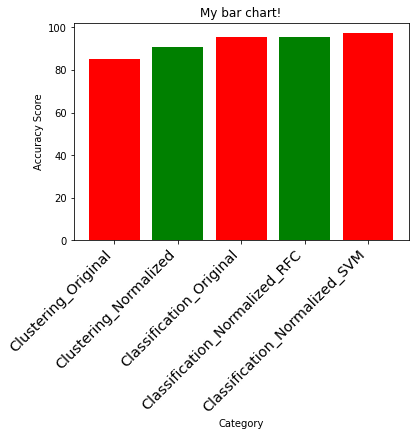

In [367]:
print(accuracy_score_Clustering_Original,
accuracy_score_Clustering_Normalized,
accuracy_score_Classification_Original,
accuracy_score_Classification_Normalized_for_RFC,
accuracy_score_Classification_Normalized_for_SVM )

# x-coordinates of left sides of bars  
left = [1, 2, 3, 4, 5] 
  
# heights of bars 
height = [accuracy_score_Clustering_Original*100, 
        accuracy_score_Clustering_Normalized*100,
        accuracy_score_Classification_Original*100,
        accuracy_score_Classification_Normalized_for_RFC*100,
        accuracy_score_Classification_Normalized_for_SVM*100]  
  
# labels for bars 
tick_label = ['Clustering_Original', 'Clustering_Normalized', 'Classification_Original','Classification_Normalized_RFC', 'Classification_Normalized_SVM'] 
  
plt.bar(left, height, tick_label = tick_label, width = 0.8, color = ['red', 'green']) 
  
plt.xlabel('Category') 
plt.ylabel('Accuracy Score') 
plt.title('My bar chart!') 

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.xticks(rotation=45)
  
# function to show the plot 
plt.show() 

If we compare Clustering and Classification, we see that Classification methods give a higher rate of correct answers.

When I looked at the graphs in the clustering stage, I noticed that there was a wrong answer in the region where the clusters approached each other. This is very normal, as it evaluates its close neighbors. Because in unsupervised learning, target data is hidden from the model.

As the classification method is supervised learning, I think it has higher accuracy rate with target data. Also, unlike clustering, the ratio was high because I chose the most suitable among 6 different models. There were models that gave the same accuracy rate as clustering.

The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. While the average of 'area_mean' is 655 in our data, the average of 'compactness_mean' is 0.1. These two features are in very different ranges, so normalizing this data is an essential technique. Because I want to evaluate all features with equal weight. Since 'area_mean' values ​​are larger, it can be perceived by the model as important than other properties. Normalization prevents this.

The accuracy rate has increased in our normalized data. Especially in the field of clustering.